Library import

In [162]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats


Since we still have some missing valuse in the overall data frame, and because we are intrested to explore only rew countries with the most ascending death rates throw the years (of course Israel is included) we will extract those countries first and the we will see how can comlete the missing data if it is relevant!

In [163]:
RelevantCountriesList=['Austria',
 'Czech Republic',
 'Finland',
 'France',
 'Germany',
 'Hungary',
 'Ireland',
 'Italy',
 'Lithuania',
 'Netherlands',
 'Norway',
 'Poland',
 'Slovenia',
 'Spain',
 'Sweden',
 'Switzerland',
 'United Kingdom',
 'United States',
 'Israel']

In [164]:
DfsList=list()
for country in RelevantCountriesList:
    tempDf=pd.read_csv('./CountryDataFrames/'+country+'.csv')
    DfsList.append(tempDf)

CountryVS_Dfs=pd.DataFrame({"Country":RelevantCountriesList,"Data_frame":DfsList})

We need to see if there is a decriment of road casulties during the years.
By calculating the slpoe of liniar regression we can conclude if the road casulties ("Killed") rate is ascending or not

In [165]:
slopeList=list()
for i in CountryVS_Dfs.index:
    Df=CountryVS_Dfs.iloc[i,1]
    countryName=CountryVS_Dfs.iloc[i,0]
    X=Df["Year"]
    Y=Df["Killed"]
    Y=[j/sum(Y) for j in Y]        # normlyzing the killed value
    slope,intercept,r,p,std_err=stats.linregress(X,Y)
    slopeList.append(slope)

In [166]:
CountryVS_Dfs["slope"]=slopeList

Here are the results

In [167]:
CountryVS_Dfs

,Country,Data_frame,slope
0,Austria,Unnamed: 0 Country Year \ 0 ...,-0.003490
1,Czech Republic,Unnamed: 0 Country Year \ 0 ...,-0.003122
2,Finland,Unnamed: 0 Country Year \ 0 ...,-0.002080
3,France,Unnamed: 0 Country Year \ 0 3...,-0.002628
4,Germany,Unnamed: 0 Country Year \ 0 ...,-0.002457
5,Hungary,Unnamed: 0 Country Year \ 0 ...,-0.001873
6,Ireland,Unnamed: 0 Country Year \ 0 ...,-0.003234
7,Italy,Unnamed: 0 Country Year \ 0 7...,-0.003089
8,Lithuania,Unnamed: 0 Country Year \ 0 ...,-0.005855
9,Netherlands,Unnamed: 0 Country Year \ 0 ...,-0.000488


We need to multipy the slope column by 1000 for conviniance

In [168]:
CountryVS_Dfs["slope"]=CountryVS_Dfs["slope"]*1000

In [169]:
CountryVS_Dfs

,Country,Data_frame,slope
0,Austria,Unnamed: 0 Country Year \ 0 ...,-3.490471
1,Czech Republic,Unnamed: 0 Country Year \ 0 ...,-3.121533
2,Finland,Unnamed: 0 Country Year \ 0 ...,-2.079815
3,France,Unnamed: 0 Country Year \ 0 3...,-2.628182
4,Germany,Unnamed: 0 Country Year \ 0 ...,-2.456849
5,Hungary,Unnamed: 0 Country Year \ 0 ...,-1.873433
6,Ireland,Unnamed: 0 Country Year \ 0 ...,-3.233515
7,Italy,Unnamed: 0 Country Year \ 0 7...,-3.089455
8,Lithuania,Unnamed: 0 Country Year \ 0 ...,-5.854503
9,Netherlands,Unnamed: 0 Country Year \ 0 ...,-0.487993


Now we will sort the Data frame by ascending values of the slop, means the the country with the most negative slope will be first

In [170]:
CountryVS_Dfs.sort_values(by="slope",ascending=True,inplace=True)

In [171]:
CountryVS_Dfs

,Country,Data_frame,slope
10,Norway,Unnamed: 0 Country Year \ 0 10...,-6.570302
8,Lithuania,Unnamed: 0 Country Year \ 0 ...,-5.854503
15,Switzerland,Unnamed: 0 Country Year \ 0 ...,-4.650940
12,Slovenia,Unnamed: 0 Country Year \ 0 ...,-4.176517
11,Poland,Unnamed: 0 Country Year \ 0 11...,-4.009028
0,Austria,Unnamed: 0 Country Year \ 0 ...,-3.490471
6,Ireland,Unnamed: 0 Country Year \ 0 ...,-3.233515
1,Czech Republic,Unnamed: 0 Country Year \ 0 ...,-3.121533
7,Italy,Unnamed: 0 Country Year \ 0 7...,-3.089455
13,Spain,Unnamed: 0 Country Year \ 0 13...,-3.002822


We rae defining a utillity function which help us generate plots

In [172]:
def plotOfKilled(country):
    row=CountryVS_Dfs[CountryVS_Dfs["Country"]==country]
    df=row.iloc[0,1]
    X=df["Year"]
    Y=df["Killed"]
    Y=[j/sum(Y) for j in Y]
    plt.title(country)
    return plt.plot(X,Y)

Now Let's use some visualization for the canedate counties: 
4 countries whitch hace the most descending killing rate , The USA and Israel.
We intend to perform ML on those countries

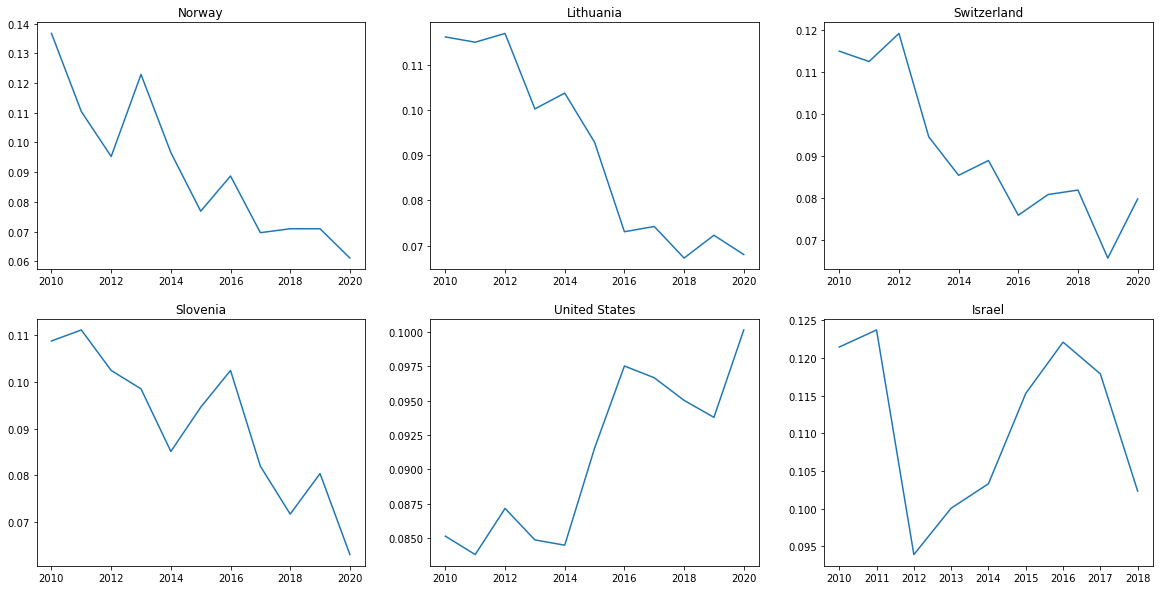

In [173]:
f=plt.figure(figsize=(20,10))
ax1=plt.subplot(231)
ax1.plot=plotOfKilled("Norway")

ax2=plt.subplot(232)
ax2.plot=plotOfKilled("Lithuania")

ax3=plt.subplot(233)
ax3.plot=plotOfKilled("Switzerland")

ax4=plt.subplot(234)
ax4.plot=plotOfKilled("Slovenia")

ax5=plt.subplot(235)
ax5.plot=plotOfKilled("United States")

ax6=plt.subplot(236)
ax6.plot=plotOfKilled("Israel")




After we chose the wanted countries we will onc again explore the data frame individually for another data cleaning or cpleation

In [174]:
chosenCountries=['Norway','Lithuania','Switzerland','Slovenia','United States','Israel']
countryDfs=CountryVS_Dfs[CountryVS_Dfs["Country"].isin(chosenCountries)]

In [175]:
countryDfs

,Country,Data_frame,slope
10,Norway,Unnamed: 0 Country Year \ 0 10...,-6.570302
8,Lithuania,Unnamed: 0 Country Year \ 0 ...,-5.854503
15,Switzerland,Unnamed: 0 Country Year \ 0 ...,-4.650940
12,Slovenia,Unnamed: 0 Country Year \ 0 ...,-4.176517
18,Israel,Unnamed: 0 Country Year Total inland tran...,-0.372409
17,United States,Unnamed: 0 Country Year \ 0 ...,1.594826


In [176]:
countryDfs.reset_index(drop=True,inplace=True)

In [177]:
countryDfs

,Country,Data_frame,slope
0,Norway,Unnamed: 0 Country Year \ 0 10...,-6.570302
1,Lithuania,Unnamed: 0 Country Year \ 0 ...,-5.854503
2,Switzerland,Unnamed: 0 Country Year \ 0 ...,-4.650940
3,Slovenia,Unnamed: 0 Country Year \ 0 ...,-4.176517
4,Israel,Unnamed: 0 Country Year Total inland tran...,-0.372409
5,United States,Unnamed: 0 Country Year \ 0 ...,1.594826


Starting with Norway

In [178]:
NorwayDf=countryDfs.iloc[0,1]

In [179]:
NorwayDf.isna().sum()

Unnamed: 0                                                                                               0
Country                                                                                                  0
Year                                                                                                     0
Total inland transport infrastructure investment                                                         1
Rail infrastructure maintenance                                                                          5
Total inland passenger transport                                                                         0
Road passenger transport                                                                                 0
Total inland freight transport in tonne-km per one thousand units of current USD GDP                     0
Road motor vehicles per one million units of current USD GDP                                             0
CO2 emissions from transport in tonne

we will dispose of the columns that are coplitly consists of NaN

In [182]:
NorwayDf_c1=NorwayDf.dropna(axis=1,thresh=5)

In [184]:
NorwayDf_c1.isna().sum()

Unnamed: 0                                                                                              0
Country                                                                                                 0
Year                                                                                                    0
Total inland transport infrastructure investment                                                        1
Rail infrastructure maintenance                                                                         5
Total inland passenger transport                                                                        0
Road passenger transport                                                                                0
Total inland freight transport in tonne-km per one thousand units of current USD GDP                    0
Road motor vehicles per one million units of current USD GDP                                            0
CO2 emissions from transport in tonnes per one

In [186]:
NorwayDf_c2=NorwayDf_c1.fillna(NorwayDf_c1.median())

C:\Users\zeev_s\AppData\Local\Temp/ipykernel_5860/4093990553.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  NorwayDf_c2=NorwayDf_c1.fillna(NorwayDf_c1.median())


Let's see if we left with NaNs

In [187]:
NorwayDf_c2.isna().sum()

Unnamed: 0                                                                                              0
Country                                                                                                 0
Year                                                                                                    0
Total inland transport infrastructure investment                                                        0
Rail infrastructure maintenance                                                                         0
Total inland passenger transport                                                                        0
Road passenger transport                                                                                0
Total inland freight transport in tonne-km per one thousand units of current USD GDP                    0
Road motor vehicles per one million units of current USD GDP                                            0
CO2 emissions from transport in tonnes per one

Now we will see if there are any outliers using histogram

array([[<AxesSubplot:title={'center':'Year'}>,
        <AxesSubplot:title={'center':'Total inland transport infrastructure investment'}>,
        <AxesSubplot:title={'center':'Rail infrastructure maintenance'}>,
        <AxesSubplot:title={'center':'Total inland passenger transport'}>,
        <AxesSubplot:title={'center':'Road passenger transport'}>],
       [<AxesSubplot:title={'center':'Total inland freight transport in tonne-km per one thousand units of current USD GDP'}>,
        <AxesSubplot:title={'center':'Road motor vehicles per one million units of current USD GDP'}>,
        <AxesSubplot:title={'center':'CO2 emissions from transport in tonnes per one million units of current USD GDP'}>,
        <AxesSubplot:title={'center':'Road traffic in vehicle-km per one thousand units of current USD GDP'}>,
        <AxesSubplot:title={'center':'Density of road (km per one hundred sq. km)'}>],
       [<AxesSubplot:title={'center':'Share of household expenditure for purchase of vehicles i

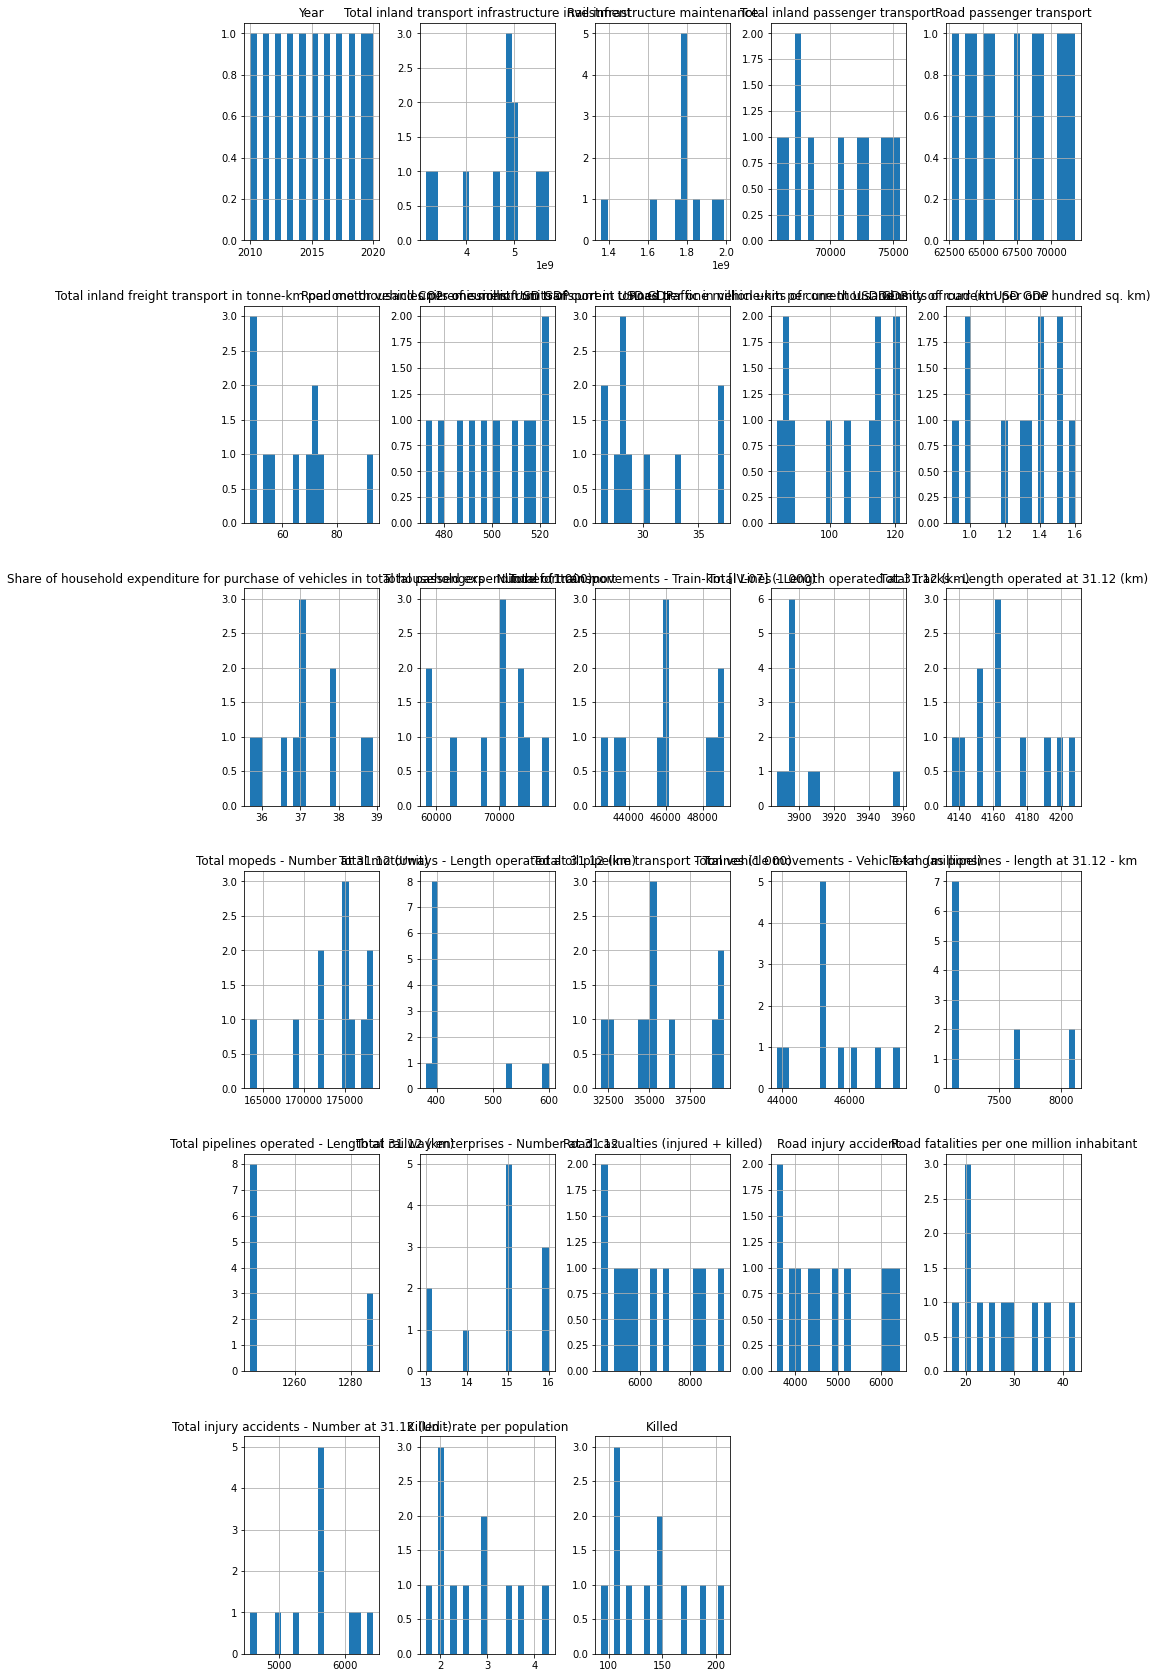

In [196]:
NorwayDf_c2.drop(["Unnamed: 0","NaNs_at_this_row"],axis=1,inplace=True)
NorwayDf_c2.hist(figsize=(15,30), bins=20)

Seems like the data is pretty much around the mean value

Grate!!! finaly a complete Data frame

In [189]:
NorwayDf_c2.to_csv("./CleanDataFrames/Norway.csv")
NorwayDf_c2

,Unnamed: 0,Country,Year,Total inland transport infrastructure investment,Rail infrastructure maintenance,Total inland passenger transport,Road passenger transport,Total inland freight transport in tonne-km per one thousand units of current USD GDP,Road motor vehicles per one million units of current USD GDP,CO2 emissions from transport in tonnes per one million units of current USD GDP,...,Total gas pipelines - length at 31.12 - km,Total pipelines operated - Length at 31.12 (km),Total railway enterprises - Number at 31.12,Road casualties (injured + killed),Road injury accident,Road fatalities per one million inhabitant,Total injury accidents - Number at 31.12 (Unit),Killed - rate per population,Killed,NaNs_at_this_row
0,10,Norway,2010,3.153260e+09,1.361104e+09,65852.0,62718.0,56.7,472.2,33.10,...,8085.0,1244.0,16.0,9338.0,6434.0,42.5,6434.0,4.3,208.0,7
1,29,Norway,2011,3.372769e+09,1.615362e+09,66777.0,63701.0,48.4,479.8,27.50,...,8113.0,1244.0,15.0,8531.0,6079.0,33.9,6079.0,3.4,168.0,7
2,48,Norway,2012,3.976858e+09,1.746639e+09,67574.0,64482.0,48.6,486.8,26.30,...,7141.0,1245.0,16.0,8340.0,6154.0,28.9,6154.0,2.9,145.0,7
3,67,Norway,2013,4.682964e+09,1.840976e+09,68484.0,65224.0,49.6,492.2,26.70,...,7131.0,1245.0,16.0,7029.0,5241.0,36.8,5241.0,3.7,187.0,7
4,86,Norway,2014,5.022322e+09,1.990042e+09,70713.0,67273.0,53.8,497.4,28.20,...,7141.0,1245.0,15.0,6438.0,4972.0,28.6,4972.0,2.9,147.0,7
5,105,Norway,2015,4.840578e+09,1.948287e+09,72344.0,68789.0,69.3,503.1,37.00,...,7141.0,1245.0,15.0,5804.0,4563.0,22.5,4563.0,2.3,117.0,8
6,124,Norway,2016,4.843910e+09,1.793807e+09,72946.0,69251.0,74.1,508.7,37.30,...,7141.0,1288.0,14.0,5674.0,4374.0,25.8,5660.0,2.6,135.0,10
7,143,Norway,2017,5.062925e+09,1.793807e+09,74132.0,70548.0,72.5,515.3,30.60,...,7625.0,1288.0,13.0,5368.0,4086.0,20.1,5660.0,2.0,106.0,9
8,161,Norway,2018,5.472575e+09,1.793807e+09,74853.0,71131.0,65.1,518.1,28.40,...,7625.0,1288.0,13.0,5049.0,3898.0,20.3,5660.0,2.0,108.0,10
9,179,Norway,2019,5.716316e+09,1.793807e+09,75494.0,71779.0,73.0,523.8,28.50,...,7141.0,1245.0,15.0,4466.0,3579.0,20.2,5660.0,2.0,108.0,23


Now its time for Lithuania

In [197]:
LithuaniaDf=countryDfs.iloc[1,1]

In [198]:
LithuaniaDf.drop(["Unnamed: 0","NaNs_at_this_row"],axis=1,inplace=True)

In [199]:
LithuaniaDf.isna().sum()

Country                                                                                                 0
Year                                                                                                    0
Total inland transport infrastructure investment                                                        0
Rail infrastructure maintenance                                                                         0
Total inland passenger transport                                                                        2
Road passenger transport                                                                                2
Total inland freight transport in tonne-km per one thousand units of current USD GDP                    0
Road motor vehicles per one million units of current USD GDP                                            0
CO2 emissions from transport in tonnes per one million units of current USD GDP                         1
Road traffic in vehicle-km per one thousand un

Well here are some good news , most of the NaNs atr 2 for eatch column, le's complete in with the median

In [201]:
LithuaniaDf_c1=LithuaniaDf.fillna(LithuaniaDf.median())

C:\Users\zeev_s\AppData\Local\Temp/ipykernel_5860/4209262422.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  LithuaniaDf_c1=LithuaniaDf.fillna(LithuaniaDf.median())


In [203]:
LithuaniaDf_c1.isna().sum()

Country                                                                                                 0
Year                                                                                                    0
Total inland transport infrastructure investment                                                        0
Rail infrastructure maintenance                                                                         0
Total inland passenger transport                                                                        0
Road passenger transport                                                                                0
Total inland freight transport in tonne-km per one thousand units of current USD GDP                    0
Road motor vehicles per one million units of current USD GDP                                            0
CO2 emissions from transport in tonnes per one million units of current USD GDP                         0
Road traffic in vehicle-km per one thousand un

No NaNs indead.
Now let's hawe a look at the histograms and try to detect outliers

array([[<AxesSubplot:title={'center':'Year'}>,
        <AxesSubplot:title={'center':'Total inland transport infrastructure investment'}>,
        <AxesSubplot:title={'center':'Rail infrastructure maintenance'}>,
        <AxesSubplot:title={'center':'Total inland passenger transport'}>,
        <AxesSubplot:title={'center':'Road passenger transport'}>,
        <AxesSubplot:title={'center':'Total inland freight transport in tonne-km per one thousand units of current USD GDP'}>],
       [<AxesSubplot:title={'center':'Road motor vehicles per one million units of current USD GDP'}>,
        <AxesSubplot:title={'center':'CO2 emissions from transport in tonnes per one million units of current USD GDP'}>,
        <AxesSubplot:title={'center':'Road traffic in vehicle-km per one thousand units of current USD GDP'}>,
        <AxesSubplot:title={'center':'Density of road (km per one hundred sq. km)'}>,
        <AxesSubplot:title={'center':'Share of household expenditure for purchase of vehicles in

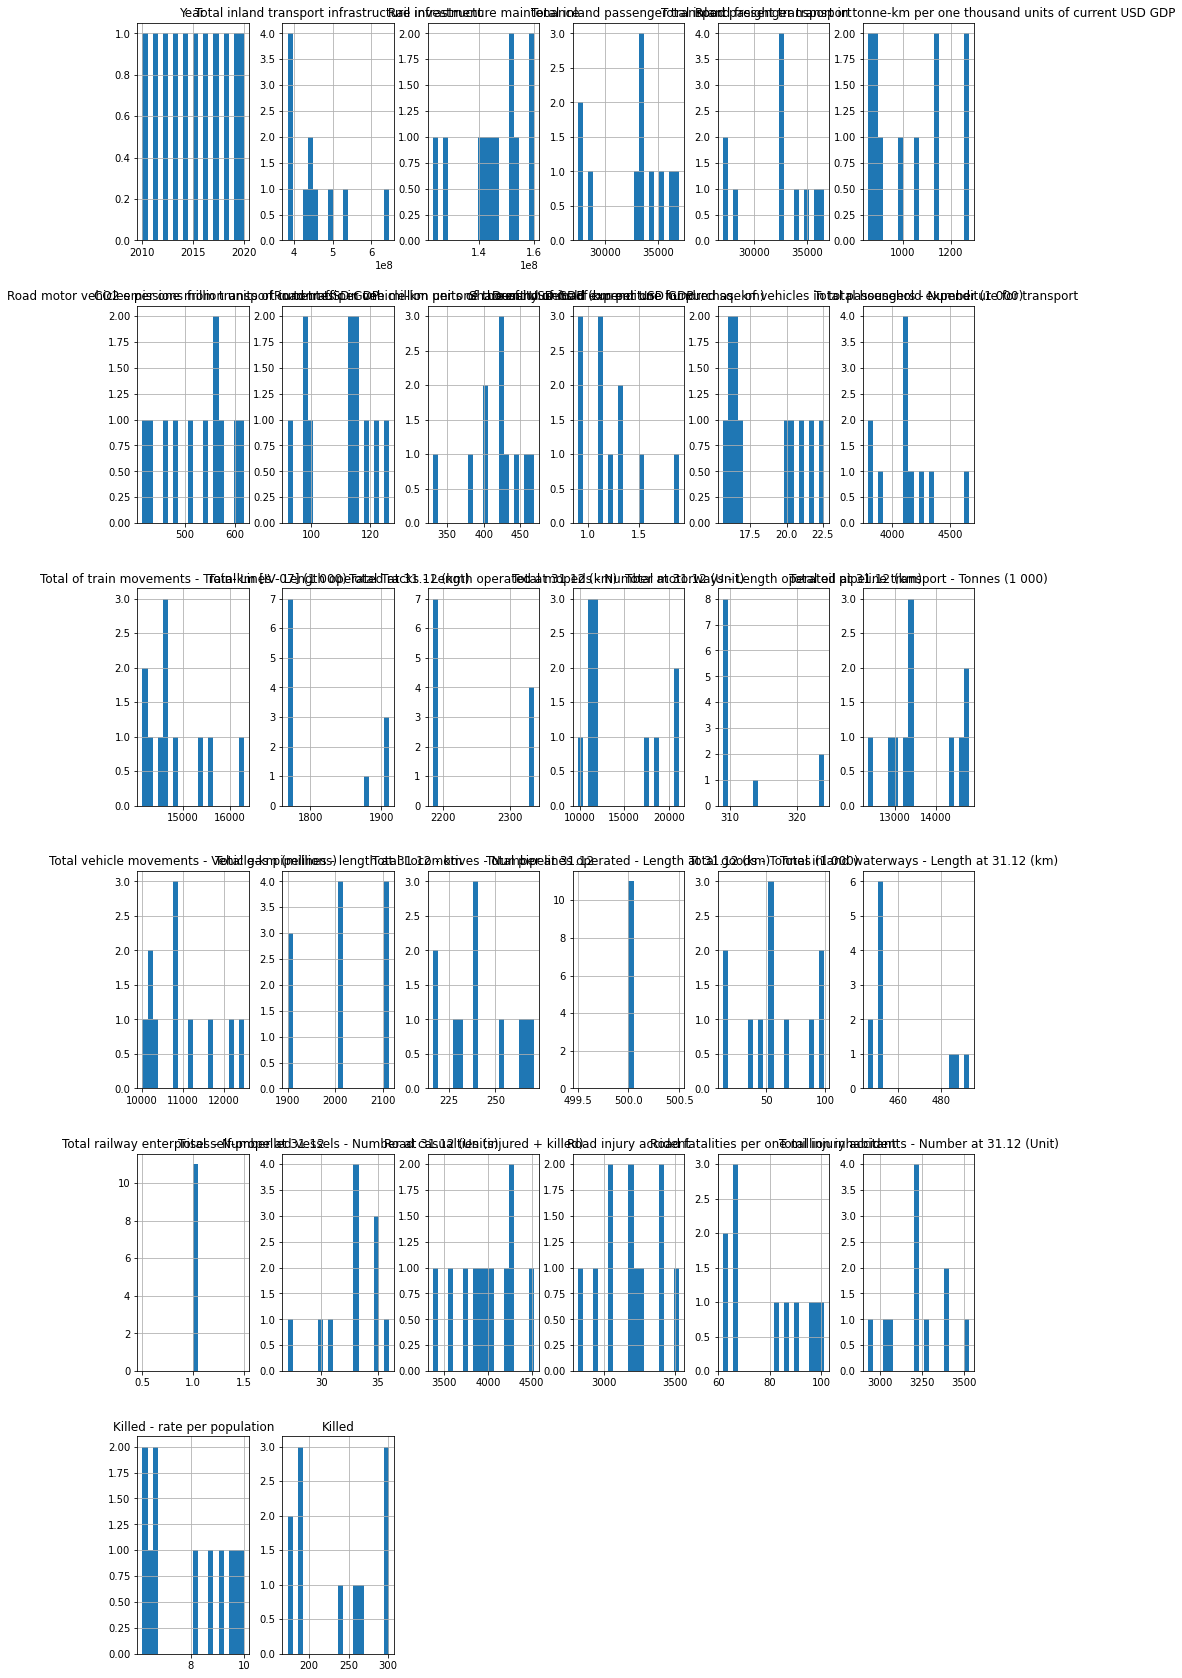

In [204]:
LithuaniaDf_c1.hist(figsize=(15,30), bins=20)

No suspishes valus in here , another one is completed , now let's save in to CSV

In [205]:
LithuaniaDf_c1.to_csv("./CleanDataFrames/Lithuania.csv")